# Data Analysis

## Librerias

### Instalacion

In [46]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

### Importacion

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

## Funciones

### Funcion boxplot precio - campo pivote

In [48]:
def fncGenerarBoxPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los diferentes subsets, para venta y alquiler.
    dfTemp1 = dfAnalisisSet.loc[(dfAnalisisSet['oferta'] == 'Alquiler') & (dfAnalisisSet['tipo'] == 'Apartamento'), [strCampoPrecio, strCampoPivote]]
    dfTemp1[strCampoPivote] = dfTemp1[strCampoPivote].astype('category')

    dfTemp2 = dfAnalisisSet.loc[(dfAnalisisSet['oferta'] == 'Venta')  & (dfAnalisisSet['tipo'] == 'Apartamento'), [strCampoPrecio, strCampoPivote]]
    dfTemp2[strCampoPivote] = dfTemp2[strCampoPivote].astype('category')


    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Generando la primera grafica (Alquiler)
    g1 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp1, ax=ax[0], palette = 'GnBu_d')
    #g1.set(xticklabels=[])
    g1.set(title=strTitulo1)
    g1.set(xlabel=None)

    # Generando la segunda grafica (Venta)
    g2 = sns.boxplot(y=strCampoPrecio, x=strCampoPivote, data=dfTemp2, ax=ax[1], palette = 'Blues')
    #g2.set(xticklabels=[])
    g2.set(title=strTitulo2)
    #g2.set(xlabel=None)

    return(plt)

### Funcion scatterplot precio - campo pivote

In [49]:
def fncGenerarScatterPlot(strCampoPrecio, strCampoPivote, strTitulo1, strTitulo2):
    # Obteniendo los subsets a evaluar
    dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', [strCampoPrecio, strCampoPivote]]
    dfTemp2 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', [strCampoPrecio, strCampoPivote]]

    # Definiendo el lienzo como subplots de 2 filas y 1 columna
    fig, ax = plt.subplots(2, 1)

    # Definiendo tamano
    fig.set_figheight(10)
    fig.set_figwidth(10)

    # Se genera la primera grafica
    g1 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp1, ax = ax[0])
    g1.set(title = strTitulo1)

    # Se genera la segunda grafica
    g2 = sns.scatterplot(x = strCampoPivote, y = strCampoPrecio, data=dfTemp2, ax = ax[1])
    g2.set(title = strTitulo2)

    return(plt)

### Funcion para construir modelo KMeans

In [50]:
def fncConstruirModeloKMeans(intKClusters, listColores, dfTemp1, factorRadio):
    
    # Se obtienen los valores que se utilizaran para la construccion de modelo KMeans
    X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

    # Construccion del modelo
    kmeanModel = KMeans(n_clusters = intKClusters, max_iter = 2000).fit(X)

    # Asignacion de clusters a registros
    dfTemp1['cluster'] = kmeanModel.labels_

    # Creacion del mapa ubicado en ciudad de Guatemala
    m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

    # Agregando marcadores circules
    for i in range(0,len(dfTemp1['precio_real'])):
        folium.Circle(
            location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
            popup=str(dfTemp1.iloc[i]['precio_real']) + '[' + str(dfTemp1.iloc[i]['cluster']) + ']'+ '\n' 
                + dfTemp1.iloc[i]['linkpagina'],
            radius=(dfTemp1.iloc[i]['precio_real']/(factorRadio * dfTemp1.iloc[i]['espacio_m2'])),
            color=listColores[dfTemp1.iloc[i]['cluster']],
            fill=True,
            fill_color=listColores[dfTemp1.iloc[i]['cluster']]).add_to(m)

    # Regresamos el objeto mapa
    return(m)

## Lectura Datos

In [51]:
dfFinalSet = pd.read_csv('FinalSet.csv', dtype = {'codigoencabezado': 'int32'})

dfFinalSet.describe(include = 'all')

codigoencabezado    idregistro  \
count        5569.000000  5.569000e+03   
unique               NaN           NaN   
top                  NaN           NaN   
freq                 NaN           NaN   
mean         2785.839828  1.096580e+09   
std          1608.009192  1.308418e+07   
min             1.000000  9.305465e+08   
25%          1394.000000  1.100259e+09   
50%          2786.000000  1.100378e+09   
75%          4178.000000  1.100417e+09   
max          5570.000000  1.100467e+09   

                                               linkpagina fecharegistro  \
count                                                5569          5569   
unique                                               2743            15   
top     https://www.olx.com.gt/item/apartamento-en-ven...    2020-06-25   
freq                                                   15           610   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

       fechalimpieza  administracion amueblado    antiguedad        banos  \
count           5569     1190.000000      3310          2627  5561.000000   
unique             2             NaN         2             8          NaN   
top       2020-07-11             NaN        No  Hasta 5 años          NaN   
freq            5080             NaN      2584           859          NaN   
mean             NaN      510.795798       NaN           NaN     1.959180   
std              NaN     3409.053475       NaN           NaN     1.014795   
min              NaN        0.000000       NaN           NaN     0.000000   
25%              NaN        0.000000       NaN           NaN     1.000000   
50%              NaN        0.000000       NaN           NaN     2.000000   
75%              NaN      111.000000       NaN           NaN     2.000000   
max              NaN    65546.000000       NaN           NaN    10.000000   

        habitaciones  ... moneda         tipo  tipo_vendedor    favoritos  \
count    5538.000000  ...   5569         5561           4300  5569.000000   
unique           NaN  ...      2            6              3          NaN   
top              NaN  ...    US$  Apartamento   Inmobiliaria          NaN   
freq             NaN  ...   3546         5422           3616          NaN   
mean        2.302636  ...    NaN          NaN            NaN     2.268630   
std         0.802603  ...    NaN          NaN            NaN    11.134723   
min         1.000000  ...    NaN          NaN            NaN     0.000000   
25%         2.000000  ...    NaN          NaN            NaN     0.000000   
50%         2.000000  ...    NaN          NaN            NaN     1.000000   
75%         3.000000  ...    NaN          NaN            NaN     2.000000   
max        10.000000  ...    NaN          NaN            NaN   642.000000   

                                                   titulo  \
count                                                5569   
unique                                               2542   
top     Alquilo Apartamento en Villa Risho, zona 14 | ...   
freq                                                   20   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                   

## Data Wrangling

### Conversion Series

In [52]:
dfAnalisisSet = dfFinalSet.astype({'codigoencabezado': 'str', 
                                'idregistro': 'str',
                                'partner_code': 'str',
                                'user_id': 'str'
                               })

dfAnalisisSet['fecharegistro'] = pd.to_datetime(dfAnalisisSet['fecharegistro'], format = "%Y-%m-%d")

dfAnalisisSet.describe(include = 'all')

codigoencabezado  idregistro  \
count              5569        5569   
unique             5569        2717   
top                4419  1100373402   
freq                  1          15   
first               NaN         NaN   
last                NaN         NaN   
mean                NaN         NaN   
std                 NaN         NaN   
min                 NaN         NaN   
25%                 NaN         NaN   
50%                 NaN         NaN   
75%                 NaN         NaN   
max                 NaN         NaN   

                                               linkpagina  \
count                                                5569   
unique                                               2743   
top     https://www.olx.com.gt/item/apartamento-en-ven...   
freq                                                   15   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

              fecharegistro fechalimpieza  administracion amueblado  \
count                  5569          5569     1190.000000      3310   
unique                   15             2             NaN         2   
top     2020-06-25 00:00:00    2020-07-11             NaN        No   
freq                    610          5080             NaN      2584   
first   2020-05-14 00:00:00           NaN             NaN       NaN   
last    2020-07-18 00:00:00           NaN             NaN       NaN   
mean                    NaN           NaN      510.795798       NaN   
std                     NaN           NaN     3409.053475       NaN   
min                     NaN           NaN        0.000000       NaN   
25%                     NaN           NaN        0.000000       NaN   
50%                     NaN           NaN        0.000000       NaN   
75%                     NaN           NaN      111.000000       NaN   
max                     NaN           NaN    65546.000000       NaN   

          antiguedad        banos  habitaciones  ... moneda         tipo  \
count           2627  5561.000000   5538.000000  ...   5569         5561   
unique             8          NaN           NaN  ...      2            6   
top     Hasta 5 años          NaN           NaN  ...    US$  Apartamento   
freq             859          NaN           NaN  ...   3546         5422   
first            NaN          NaN           NaN  ...    NaN          NaN   
last             NaN          NaN           NaN  ...    NaN          NaN   
mean             NaN     1.959180      2.302636  ...    NaN          NaN   
std              NaN     1.014795      0.802603  ...    NaN          NaN   
min              NaN     0.000000      1.000000  ...    NaN          NaN   
25%              NaN     1.000000      2.000000  ...    NaN          NaN   
50%              NaN     2.000000      2.000000  ...    NaN          NaN   
75%              NaN     2.000000      3.000000  ...    NaN          NaN   
max              NaN    10.000000     10.000000  ...    NaN          NaN   

        tipo_vendedor    favoritos  \
count            4300  5569.000000   
unique              3          NaN   
top      Inmobiliaria          NaN   
freq             3616          NaN   
first             NaN          NaN   
last              NaN          NaN   
mean              NaN     2.268630   
std               NaN    11.134723   
min               NaN     0.000000   
25%               NaN     0.000000   
50%               NaN     1.000000   
75%               NaN     2.000000   
max               NaN   642.000000   

            

### Registros Unicos
Se obtendran solo los ultimos registros obtenidos para cada id de registro (idregistro) utilizando el campo fecharegistro.

In [53]:
dfAnalisisSet = dfAnalisisSet.loc[dfAnalisisSet.reset_index().groupby(['idregistro'])['fecharegistro'].idxmax()]

dfAnalisisSet.head(10)

codigoencabezado  idregistro  \
2538             1632  1007688385   
4049             3157  1009069375   
1885              976  1014321966   
1886              977  1014324725   
1876              967  1015576872   
3938             3048  1020454552   
3939             3049  1022776785   
1467              557  1023789298   
1468              558  1023944274   
1470              560  1029720345   

                                             linkpagina fecharegistro  \
2538  https://www.olx.com.gt/item/venta-apartamento-...    2020-06-10   
4049  https://www.olx.com.gt/item/vendo-lindo-aparta...    2020-06-25   
1885  https://www.olx.com.gt/item/apartamentos-y-ofi...    2020-05-30   
1886  https://www.olx.com.gt/item/apartamentos-nuevo...    2020-05-30   
1876  https://www.olx.com.gt/item/amplio-apartamento...    2020-05-30   
3938  https://www.olx.com.gt/item/apartamento-en-cas...    2020-06-25   
3939  https://www.olx.com.gt/item/apartamento-amuebl...    2020-06-25   
1467  https://www.olx.com.gt/item/alquilo-apartament...    2020-05-25   
1468  https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
1470  https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   

     fechalimpieza  administracion amueblado         antiguedad  banos  \
2538    2020-07-11             NaN       NaN  Entre 5 y 10 años    3.0   
4049    2020-07-11             NaN       NaN                NaN    3.0   
1885    2020-07-11             NaN       NaN    En construcción    2.0   
1886    2020-07-11             NaN       NaN         A estrenar    2.0   
1876    2020-07-11             NaN        No  Entre 5 y 10 años    2.0   
3938    2020-07-11             NaN       NaN                NaN    2.0   
3939    2020-07-11             NaN        Si                NaN    2.0   
1467    2020-07-11             NaN        No                NaN    2.0   
1468    2020-07-11             NaN       NaN                NaN    2.0   
1470    2020-07-11             NaN       NaN                NaN    2.0   

      habitaciones  ... moneda         tipo  tipo_vendedor  favoritos  \
2538           3.0  ...    US$  Apartamento   Inmobiliaria          6   
4049           2.0  ...    US$  Apartamento   Inmobiliaria          8   
1885           1.0  ...    US$  Apartamento   Inmobiliaria          1   
1886           2.0  ...    US$  Apartamento   Inmobiliaria         28   
1876           2.0  ...      Q  Apartamento   Inmobiliaria         13   
3938           3.0  ...    US$         Casa   Inmobiliaria          0   
3939           2.0  ...    US$  Apartamento   Inmobiliaria          2   
1467           3.0  ...    US$  Apartamento   Inmobiliaria          1   
1468           2.0  ...    US$  Apartamento   Inmobiliaria          0   
1470           3.0  ...    US$  Apartamento   Inmobiliaria          4   

                                                 titulo  \
2538                          VENTA APARTAMENTO ZONA 10   
4049  Vendo lindo apartamento en Veinti4 zona 10 USD...   
1885  Apartamentos y Oficinas en Diagonal 6 zona 10,...   
1886  Apartamentos NUEVOS 2 y 3 dormitorios Vista He...   
1876  Amplio Apartamento alquilado en Jardines de La...   
3938       APARTAMENTO EN CASA MARGARITA, ZONA 10/ACODI   
3939             APARTAMENTO AMUEBLADO EN ZONA 16/ACODI   
1467  ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI   
1468  VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...   
1470  VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...   

                 fecha_creacion               valido_hasta  \
2538  2020-06-07T15:50:39-06:00  2020-09-05T15:50:39-06:00   
4049  2020-06-21T11:55:23-06:00  2020-09-19T11:55:23-06:00   
1885  2020-05-27T16:38:13-06:00  2020-08-25T16:38:13-06:00   
1886  2020-05-27T16:34:58-06:00  2020-08-25T16:34:58-06:00   
1876  2020-05-27T17:25:02-06:00  2020-08-25T17:25:02-06:00   
3938  2020-06-23T12:03:21-06:00  2020-09-21T12:03:21-06:00   
3939  2020-06-23T12:03:18-06:00  2020-09-21T12:03:18-06:00   
1467  2020-05-23T14:54:00-06

### Cambio Moneda Precio

In [54]:
cambio_moneda = 7.69
dfAnalisisSet['precio_real'] = np.where(dfAnalisisSet['moneda'] == 'US$', dfAnalisisSet['precio'] * cambio_moneda, 
                                        dfAnalisisSet['precio'])

dfAnalisisSet.head(10)

codigoencabezado  idregistro  \
2538             1632  1007688385   
4049             3157  1009069375   
1885              976  1014321966   
1886              977  1014324725   
1876              967  1015576872   
3938             3048  1020454552   
3939             3049  1022776785   
1467              557  1023789298   
1468              558  1023944274   
1470              560  1029720345   

                                             linkpagina fecharegistro  \
2538  https://www.olx.com.gt/item/venta-apartamento-...    2020-06-10   
4049  https://www.olx.com.gt/item/vendo-lindo-aparta...    2020-06-25   
1885  https://www.olx.com.gt/item/apartamentos-y-ofi...    2020-05-30   
1886  https://www.olx.com.gt/item/apartamentos-nuevo...    2020-05-30   
1876  https://www.olx.com.gt/item/amplio-apartamento...    2020-05-30   
3938  https://www.olx.com.gt/item/apartamento-en-cas...    2020-06-25   
3939  https://www.olx.com.gt/item/apartamento-amuebl...    2020-06-25   
1467  https://www.olx.com.gt/item/alquilo-apartament...    2020-05-25   
1468  https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   
1470  https://www.olx.com.gt/item/vendo-apartamento-...    2020-05-25   

     fechalimpieza  administracion amueblado         antiguedad  banos  \
2538    2020-07-11             NaN       NaN  Entre 5 y 10 años    3.0   
4049    2020-07-11             NaN       NaN                NaN    3.0   
1885    2020-07-11             NaN       NaN    En construcción    2.0   
1886    2020-07-11             NaN       NaN         A estrenar    2.0   
1876    2020-07-11             NaN        No  Entre 5 y 10 años    2.0   
3938    2020-07-11             NaN       NaN                NaN    2.0   
3939    2020-07-11             NaN        Si                NaN    2.0   
1467    2020-07-11             NaN        No                NaN    2.0   
1468    2020-07-11             NaN       NaN                NaN    2.0   
1470    2020-07-11             NaN       NaN                NaN    2.0   

      habitaciones  ...         tipo  tipo_vendedor  favoritos  \
2538           3.0  ...  Apartamento   Inmobiliaria          6   
4049           2.0  ...  Apartamento   Inmobiliaria          8   
1885           1.0  ...  Apartamento   Inmobiliaria          1   
1886           2.0  ...  Apartamento   Inmobiliaria         28   
1876           2.0  ...  Apartamento   Inmobiliaria         13   
3938           3.0  ...         Casa   Inmobiliaria          0   
3939           2.0  ...  Apartamento   Inmobiliaria          2   
1467           3.0  ...  Apartamento   Inmobiliaria          1   
1468           2.0  ...  Apartamento   Inmobiliaria          0   
1470           3.0  ...  Apartamento   Inmobiliaria          4   

                                                 titulo  \
2538                          VENTA APARTAMENTO ZONA 10   
4049  Vendo lindo apartamento en Veinti4 zona 10 USD...   
1885  Apartamentos y Oficinas en Diagonal 6 zona 10,...   
1886  Apartamentos NUEVOS 2 y 3 dormitorios Vista He...   
1876  Amplio Apartamento alquilado en Jardines de La...   
3938       APARTAMENTO EN CASA MARGARITA, ZONA 10/ACODI   
3939             APARTAMENTO AMUEBLADO EN ZONA 16/ACODI   
1467  ALQUILO APARTAMENTO EN ZONA 16undefined#x2F;ACODI   
1468  VENDO APARTAMENTO EN AIRALI, ZONA 10 OPCIÓN 2u...   
1470  VENDO APARTAMENTO EN ACANTOS DE CAYALA, ZONA 1...   

                 fecha_creacion               valido_hasta  \
2538  2020-06-07T15:50:39-06:00  2020-09-05T15:50:39-06:00   
4049  2020-06-21T11:55:23-06:00  2020-09-19T11:55:23-06:00   
1885  2020-05-27T16:38:13-06:00  2020-08-25T16:38:13-06:00   
1886  2020-05-27T16:34:58-06:00  2020-08-25T16:34:58-06:00   
1876  2020-05-27T17:25:02-06:00  2020-08-25T17:25:02-06:00   
3938  2020-06-23T12:03:21-06:00  2020-09-21T12:03:21-06:00   
3939  2020-06-23T12:03:18-06:00  2020-09-21T12:03:18-06:00   
1467  2020-05-23T14:54:00-06:00  2020-08-21T14:54:00-06:00   
1468  2020-05-23T14:49:40-06:00  2020-08-21

### Columna Oferta
Se creara una columna que determine si la oferta es de alquiler o venta. Se utilizara el campo 

In [55]:
dfAnalisisSet['oferta'] = ['Venta' if precio > 50000 else 'Alquiler' for precio in dfAnalisisSet['precio_real']]

dfAnalisisSet.groupby(['oferta']).count()['codigoencabezado']

oferta
Alquiler    1568
Venta       1149
Name: codigoencabezado, dtype: int64

## Data Visualization

### Precio por apartamento amueblado

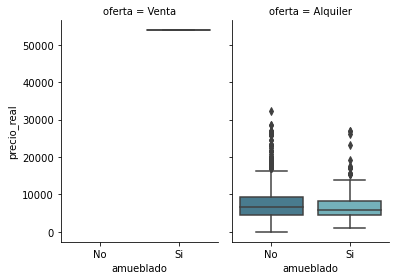

In [56]:
sns.catplot(x = 'amueblado', y = 'precio_real', 
            col = 'oferta', 
            kind = 'box', 
            data = dfAnalisisSet,
            palette = 'GnBu_d',
            height=4, 
            aspect=.7)

### Precio por antiguedad

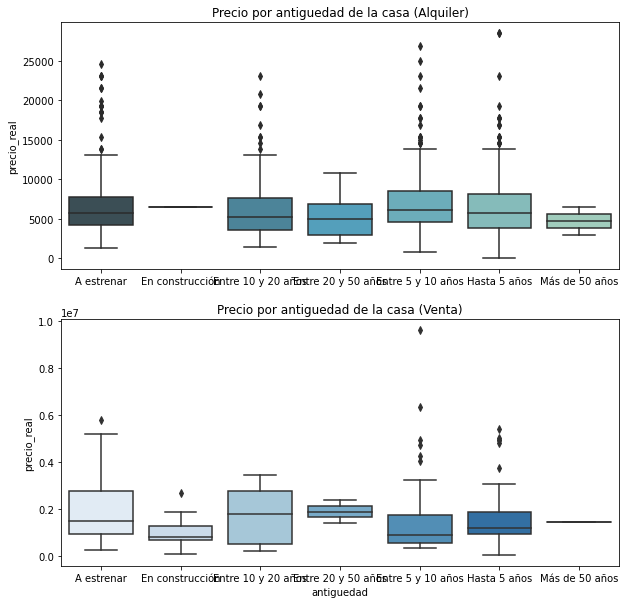

In [57]:
plt = fncGenerarBoxPlot('precio_real', 'antiguedad', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()


### Precio por moneda

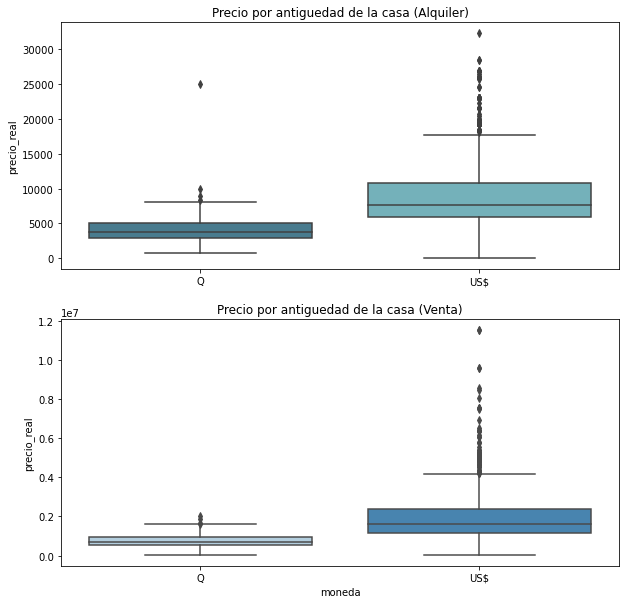

In [58]:
plt = fncGenerarBoxPlot('precio_real', 'moneda', 
                        'Precio por antiguedad de la casa (Alquiler)', 
                        'Precio por antiguedad de la casa (Venta)')
plt.show()

### Precio por banos

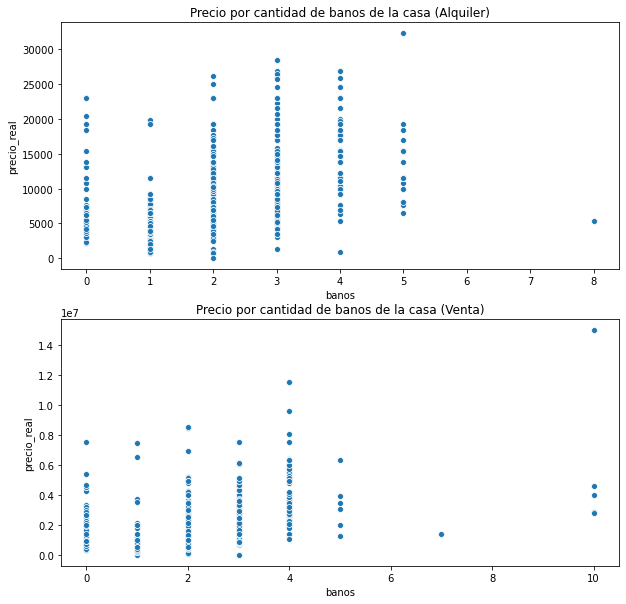

In [59]:
plt = fncGenerarScatterPlot('precio_real', 'banos', 
                            'Precio por cantidad de banos de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por habitaciones

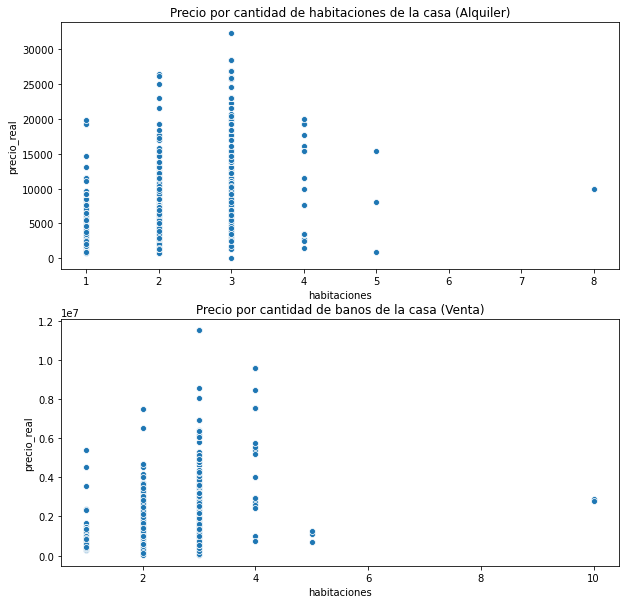

In [60]:
plt = fncGenerarScatterPlot('precio_real', 'habitaciones', 
                            'Precio por cantidad de habitaciones de la casa (Alquiler)',
                            'Precio por cantidad de banos de la casa (Venta)')

plt.show()

### Precio por espacio (m2)

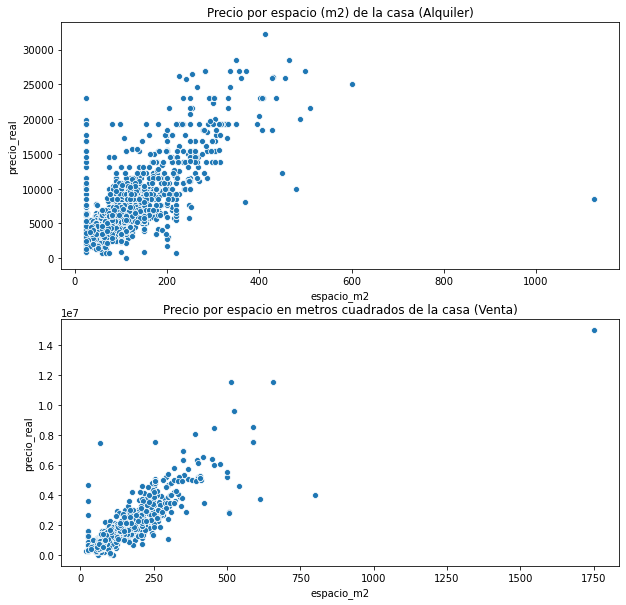

In [61]:
plt = fncGenerarScatterPlot('precio_real', 'espacio_m2', 
                            'Precio por espacio (m2) de la casa (Alquiler)',
                            'Precio por espacio en metros cuadrados de la casa (Venta)')

plt.show()

In [62]:
dfTemp = dfAnalisisSet.loc[(dfAnalisisSet['oferta'] == 'Venta') & (dfAnalisisSet['precio_real'] > 2000000) &
                          (dfAnalisisSet['espacio_m2'] < 50), ['codigoencabezado', 'espacio_m2', 'precio_real']]

dfTemp.head()

codigoencabezado  espacio_m2  precio_real
1585              675        25.0    3652750.0
1590              680        25.0    2691500.0
170              4804        25.0    4706280.0

### Precio y ubicacion

In [63]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 5,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

In [64]:
# Creacion del mapa ubicado en ciudad de Guatemala
m = folium.Map(location=[14.6407, -90.5132], zoom_start=12.3)

# Obteniendo los subsets a evaluar
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Agregando marcadores circules
for i in range(0,len(dfTemp1['precio_real'])):
    folium.Circle(
        location=[dfTemp1.iloc[i]['latitud'], dfTemp1.iloc[i]['longitud']],
        popup=str(dfTemp1.iloc[i]['precio_real']) + dfTemp1.iloc[i]['linkpagina'],
        radius=(dfTemp1.iloc[i]['precio_real']/dfTemp1.iloc[i]['espacio_m2'])/ 500,
        color='blue',
        fill=True,
        fill_color='blue').add_to(m)


m

### Precio por parqueo (tiene o no)

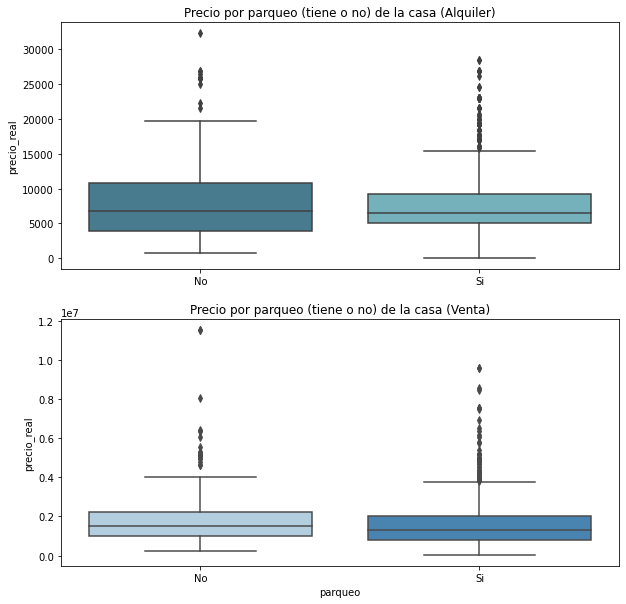

In [65]:
plt = fncGenerarBoxPlot('precio_real', 'parqueo', 
                        'Precio por parqueo (tiene o no) de la casa (Alquiler)', 
                        'Precio por parqueo (tiene o no) de la casa (Venta)')
plt.show()

### Precio por tipo(casa o apartamento)

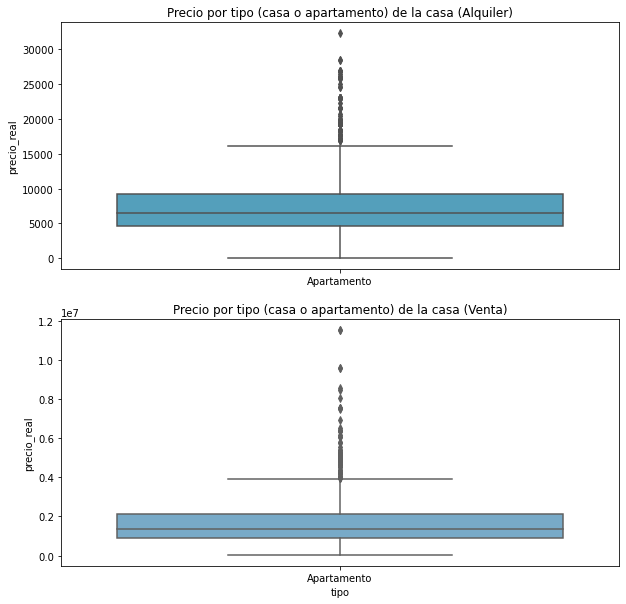

In [66]:
plt = fncGenerarBoxPlot('precio_real', 'tipo', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por tipo de vendedor

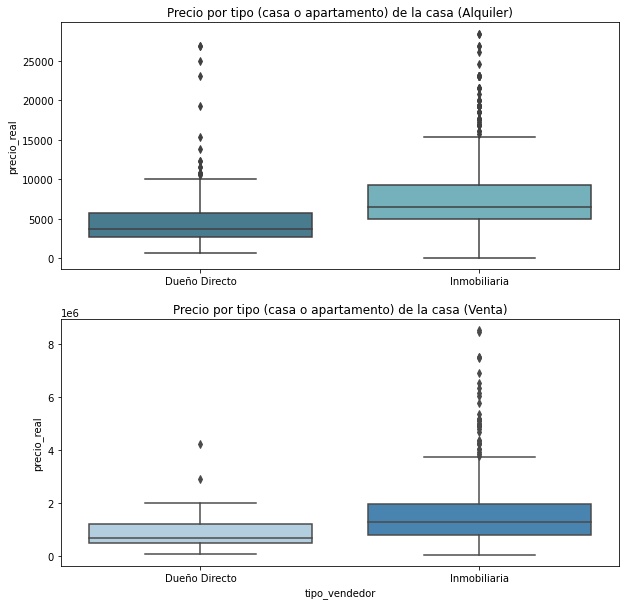

In [67]:
plt = fncGenerarBoxPlot('precio_real', 'tipo_vendedor', 
                        'Precio por tipo (casa o apartamento) de la casa (Alquiler)', 
                        'Precio por tipo (casa o apartamento) de la casa (Venta)')
plt.show()

### Precio por favoritos

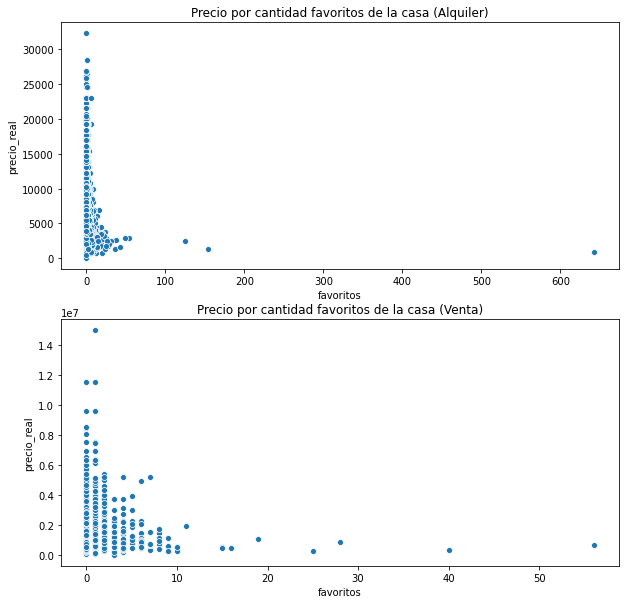

In [68]:
plt = fncGenerarScatterPlot('precio_real', 'favoritos', 
                            'Precio por cantidad favoritos de la casa (Alquiler)',
                            'Precio por cantidad favoritos de la casa (Venta)')

plt.show()

### Elbow - KMeans (Venta)

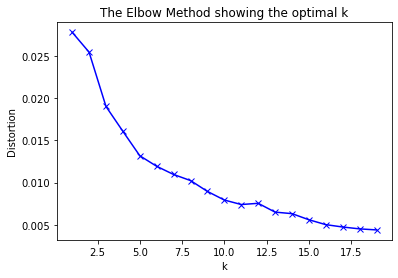

In [69]:
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

X = np.array(list(zip(dfTemp1['longitud'], dfTemp1['latitud']))).reshape(len(dfTemp1['longitud']), 2)

# Determinacion de valor K
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Precio Ubicacion Clusterizados (Venta)

In [70]:
# Seleccion de la cantidad de clusters
kClusters = 12

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
    'red',
    'yellow',
    'orange'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Venta', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 500)

# Mostrar mapa
m

### Precio Ubicacion Clusterizados (Alquiler)

In [71]:
# Seleccion de la cantidad de clusters
kClusters = 10

# Colores a utilizar
listaColores = [
    '#d50102',
    '#a6b401',
    '#e55b7e',
    '#00243f',
    '#216a61',
    '#005236',
    '#b94d5c',
    '#dc3080',
    'lightgray',
    'black'
]

# Filtrar dataframe a utilizar para analisis
dfTemp1 = dfAnalisisSet.loc[dfAnalisisSet['oferta'] == 'Alquiler', 
                            ['precio_real', 'latitud', 'longitud', 'linkpagina', 'espacio_m2']]

# Construccion del mapa utilizando k-means
m = fncConstruirModeloKMeans(kClusters, listaColores, dfTemp1, 5)

# Mostrar mapa
m